## Index Compression
- Less disk space, usually can cut cost of storing the index by 75%
- Increased use of caching to avoid having to use disk seeks
- Compression techniques discussed are `lossless`, i.e. all information is preserved
- `Lossy compression`: some information is lost (e.g. through case folding, stemming, or stop word elimination)


#### Heap's Law
- Estimates vocabulary size as a function of collection size
- `M = kT^b`, *T* is the number of tokens in the collection and *k* and *b* are constants

#### Zip's Law
- The `ith` most frequent term has frequency proportional to `1/i`
- `cfi` (collection frequency of a term) is proportional to `1/i` = `K/i` where K is a normalizing constant
- If most frequent term occurs `cf1` times, second most will occur `cf1/2` times, third most `cf1/3` times, etc. etc.
- Using this helps us find the rank, **not number of words**, to do that we have to take `rank_(i) - rank_(i+1)`

### Dictionary Compression
- Motivation: compressing the dictionary so it can fit in main memory, or at least a large portion in order to support high query throughput. 
- Also can lead to fast startup times in limited hardware systems


1) *Dictionary-as-a-string*
- Store the lexicographically ordered list of all terms in an array of fixed-width entries.
- Need to store term pointers to demarcate the end of one term and the beginning of another term
- Saves around ~40-50% in dictionary size

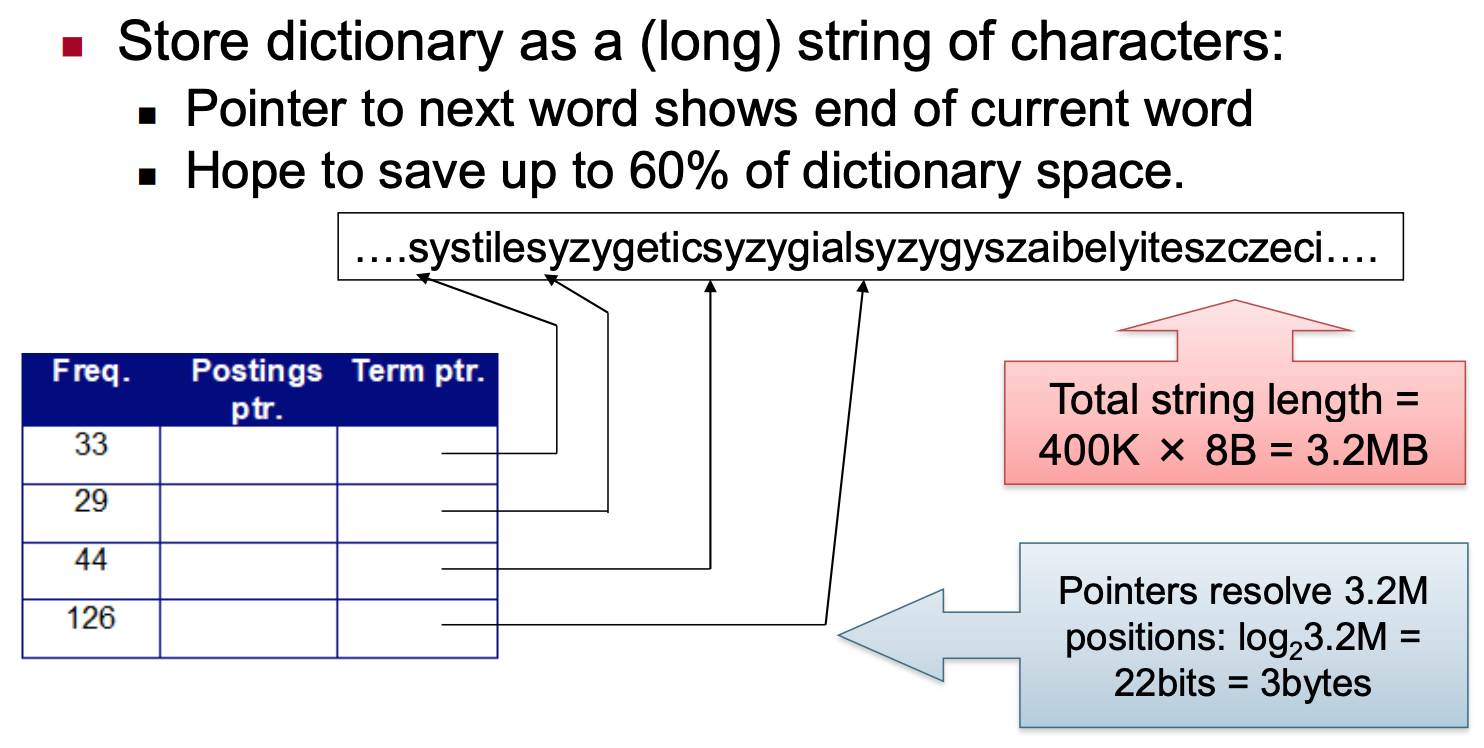

2) *Blocked storage*
- Grouping terms in the stirng into blocks of size `k`, keep a term pointer only for the first term of each block
- Need to store the length of the term as an additional byte
- Thus eliminate `k-1` term pointers but need an additional `k` bytes for storing the length of each term.
- The larger the k value, the more we can save on space.
    - Tradeoff: Will impact querying speed, as we need to linearly search within each block
    
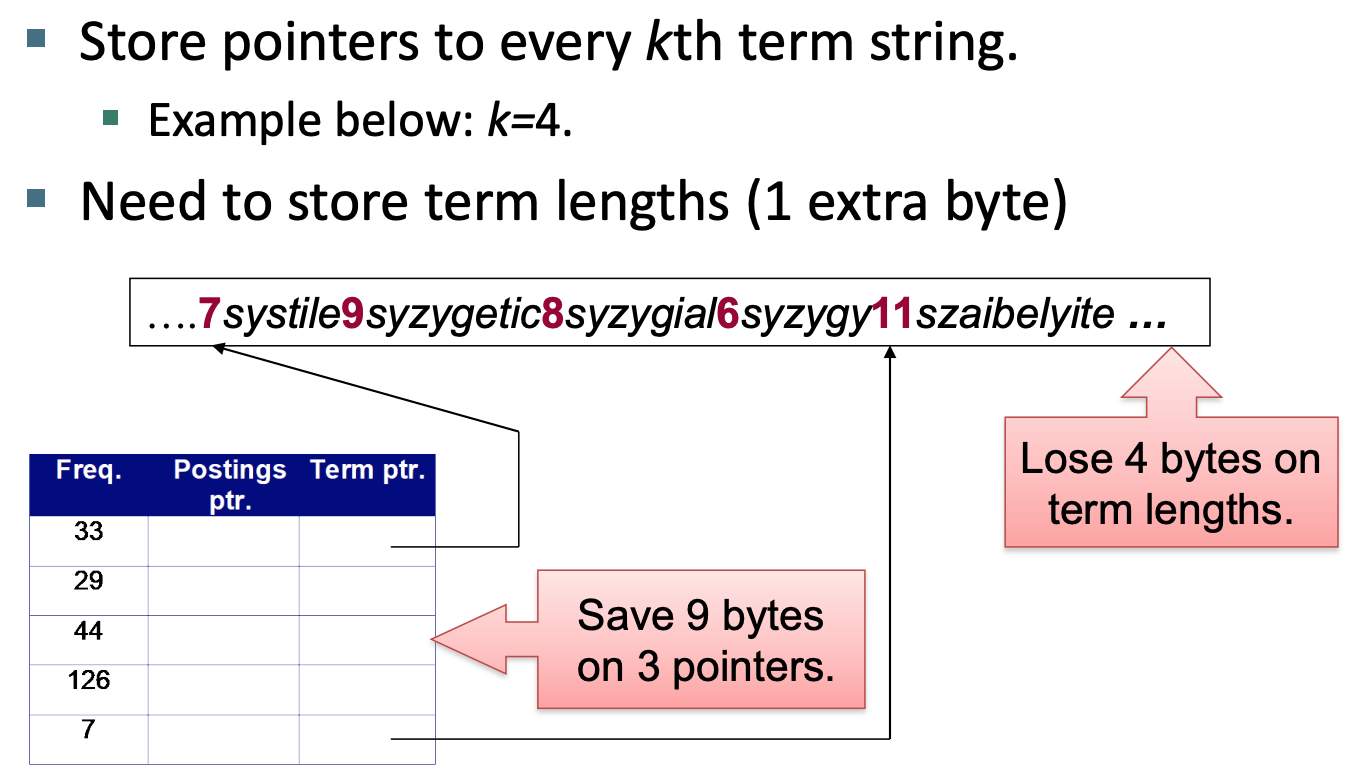

3) *Front coding*
- Consecutive entries in an alphabetically sorted list share common prefixes. 
- Common prefix is identified for a subsequence of the term list and then referred to with a special character

| Technique                                           | Size in MB |
|-----------------------------------------------------|------------|
| Fixed width                                         | 11.2       |
| Dictionary as string with pointers to every term    | 7.6        |
| Dictionary as string with blocking k = 4            | 7.1        |
| Dictionary as string with blocking and front coding | 5.9        |

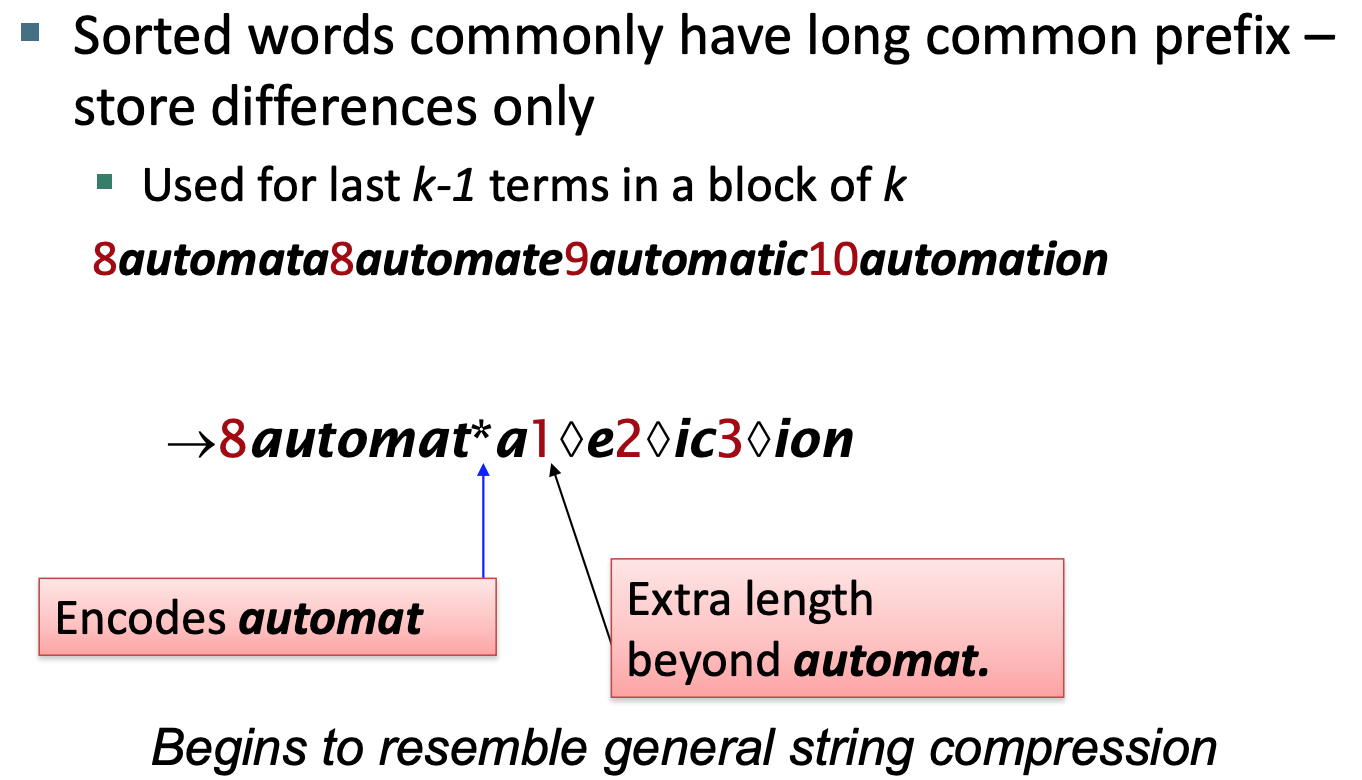

### Postings Compression
- Premise of `gap encoding`: gaps between postings are short, requiring a lot less space than 20 bits to store, in fact gaps for the most frequent terms such as `the` and `for` are mostly equal to 1.
- We store the **difference** compared to the previous one. eg. 33, 47, 154 translates to 33, 14, 107

1) *Variable byte codes*
- Uses an integral number of bytes to encode a gap. 
- Last 7 bits of a byte are the *payload* and encode part of the gap. The first **bit** is a *continuation bit*. It is set to 1 for the last **bit** of the encoded gap and to 0 otherwise. 
- Continuation bit is to let us know whether it is a larger number and if we should use a larger byte integer.
- Number of bits needed: log2(G), where G is the docID number

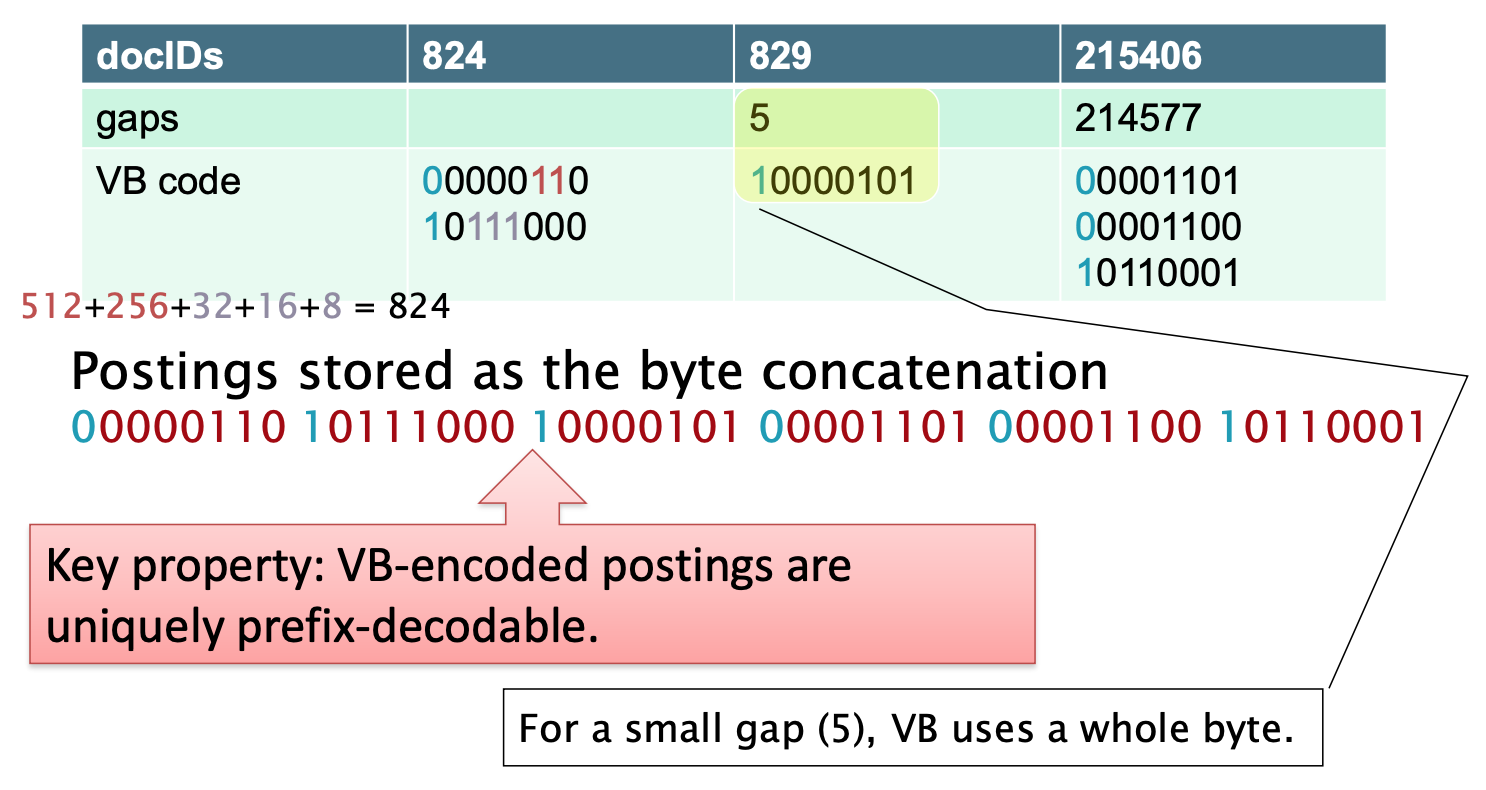